## Feature Engineering

In [1]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


In [2]:
# N dim array & data frame support
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt

#show plots in notebooks
%matplotlib inline

# seaborn for plotting as well
import seaborn as sns

In [3]:
df = pd.read_csv('cleaned_df.csv')

In [4]:
df.head(5)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


## Use Domain Knowledge

In [5]:
# Create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [6]:
# Display percent of rows where two_and_two == 1
df['two_and_two'].mean()

0.09458023379383634

In [7]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

In [8]:
# Print percent of transactions where during_recession == 1
df.during_recession.mean()

0.2635494155154091

## Create Interaction Features

In [9]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

In [10]:
# Should not be less than 0
print(df.property_age.min())

-8


In [11]:
# Number of observations with 'property_age' < 0
sum(df.property_age < 0)

19

In [12]:
# Remove rows where property_age is less than 0
print(df.shape)

df = df[ df.property_age >= 0]

# Print number of rows in remaining dataframe
print(df.shape)

(1882, 29)
(1863, 29)


In [13]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df.num_schools * df.median_school

In [14]:
# Display median school score
print(df.school_score.median())

18.0


## Group Sparse Classes

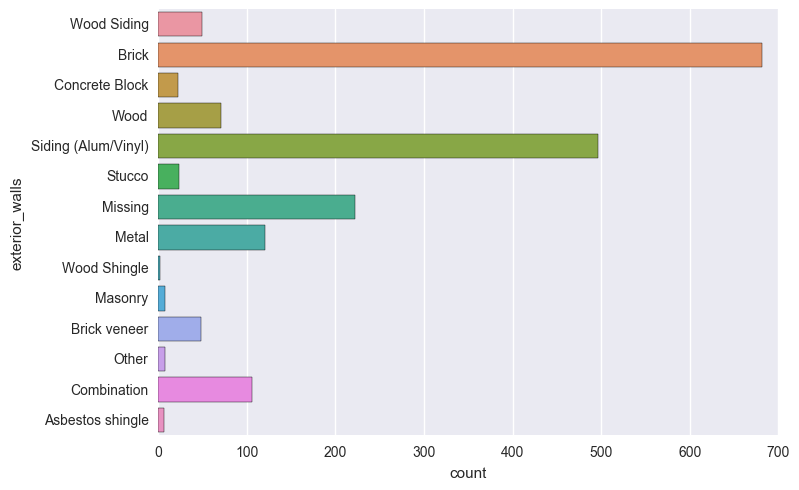

In [15]:
sns.countplot(y='exterior_walls', data=df)

In [16]:
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

In [17]:
# List of classes to group
grp_classes = ['Stucco', 'Other', 'Asbestos shingle', 'Concrete Block', 'Masonry']

# Group other classes into 'Other'
df.exterior_walls.replace(grp_classes, 'Other', inplace=True)

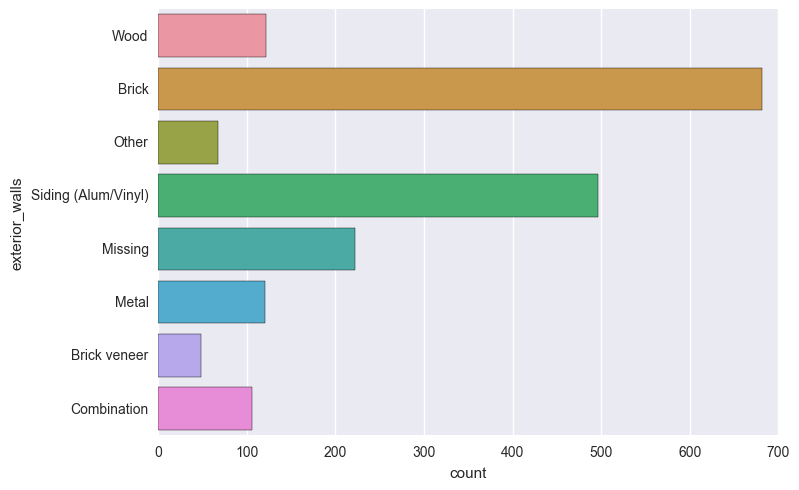

In [18]:
sns.countplot(y='exterior_walls', data=df)

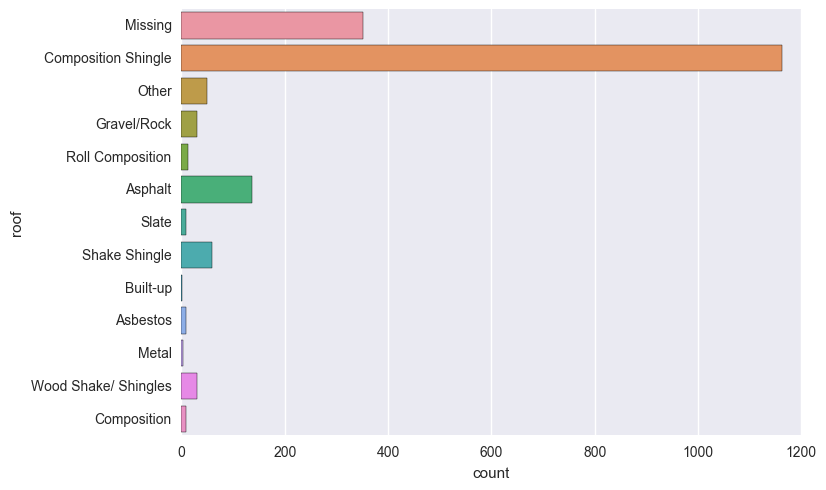

In [19]:
sns.countplot(y='roof', data=df)

In [20]:
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

In [21]:
# List of classes to group
grp_classes = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

# Group other classes into 'Other'
df.roof.replace(grp_classes, 'Other', inplace=True)

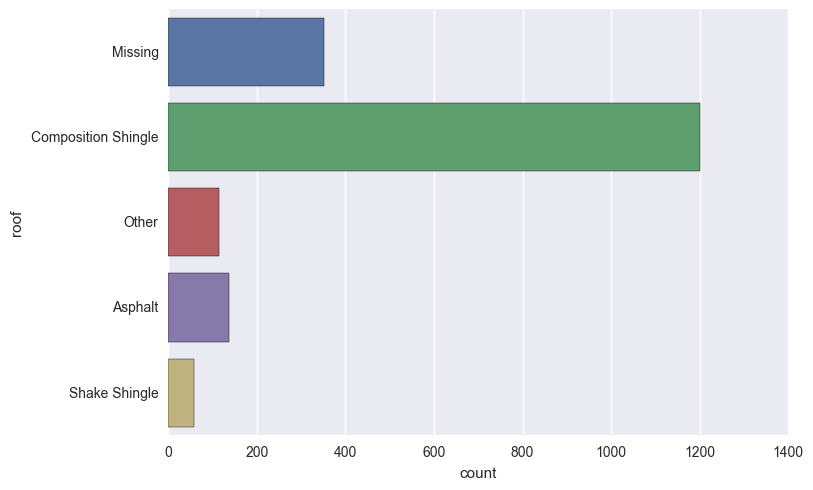

In [22]:
sns.countplot(y='roof', data=df)

## Encode Dummy Variables

Encode the categorical variables into dummy variables. This is also called **'one hot'** encodings.

In [23]:
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

In [24]:
df.head(5)

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,216500,1,1,612,1965,0,1.0,105,15,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,279900,1,1,615,1963,0,0.0,183,13,31,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,379900,1,1,618,2000,33541,0.0,198,9,38,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,340000,1,1,634,1992,0,0.0,149,7,22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
df.columns

Index([u'tx_price', u'beds', u'baths', u'sqft', u'year_built', u'lot_size',
       u'basement', u'restaurants', u'groceries', u'nightlife', u'cafes',
       u'shopping', u'arts_entertainment', u'beauty_spas', u'active_life',
       u'median_age', u'married', u'college_grad', u'property_tax',
       u'insurance', u'median_school', u'num_schools', u'tx_year',
       u'two_and_two', u'during_recession', u'property_age', u'school_score',
       u'exterior_walls_Brick', u'exterior_walls_Brick veneer',
       u'exterior_walls_Combination', u'exterior_walls_Metal',
       u'exterior_walls_Missing', u'exterior_walls_Other',
       u'exterior_walls_Siding (Alum/Vinyl)', u'exterior_walls_Wood',
       u'roof_Asphalt', u'roof_Composition Shingle', u'roof_Missing',
       u'roof_Other', u'roof_Shake Shingle',
       u'property_type_Apartment / Condo / Townhouse',
       u'property_type_Single-Family'],
      dtype='object')

## Remove Unused or Redundant features

In [26]:
df = df.drop(['tx_year', 'year_built'], axis=1)

In [27]:
# analytical base table
df.to_csv('analytical_base_table.csv', index=None)